In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#sns.set(font_scale = 2,rc={'text.usetex': True})
sns.set_style("whitegrid")
sns.set(font_scale = 2)

In [2]:
def rename_dataset_name(name): 
    rename_map = {
        'breast_cancer': "Breast Cancer", 
        'german_credit': "German Credit"
    }
    
    new_name = rename_map.get(name)
    if not new_name: 
        return name.capitalize()
    else: 
        return new_name
    

In [3]:
df = pd.read_csv("results-other.csv")
df_lptml = pd.read_csv("reformatted_results.csv")

df_lptml = df_lptml[df_lptml["PCA"] == 4]
#df_lptml["dataset_name"] = df_lptml[["dataset_name", "dataset_dimensions(elements|features|classes)"]].apply(lambda x: x["dataset_name"] + " " + x["dataset_dimensions(elements|features|classes)"].replace("|",","), axis=1)
df_lptml.rename(columns={
    "avg_precision": "precision",
    "avg_recall": "recall",
    "avg_f1": "f1",
    "avg_accuracy": "accuracy",
}, inplace=True)
# Drop for now std
df_lptml = df_lptml[["algorithm","dataset_name","dataset_dimensions(elements|features|classes)","PCA","adversarial_noise","accuracy", "precision","recall","f1"]]
df_lptml.head()

,algorithm,dataset_name,dataset_dimensions(elements|features|classes),PCA,adversarial_noise,accuracy,precision,recall,f1
1,LPTML,breast_cancer,(699|9|2),4,0.1,0.949,0.943,0.946,0.944
3,LPTML,breast_cancer,(699|9|2),4,0.2,0.965,0.959,0.963,0.961
5,LPTML,breast_cancer,(699|9|2),4,0.3,0.965,0.959,0.963,0.961
7,LPTML,vehicle,(846|18|4),4,0.1,0.484,0.489,0.489,0.479
9,LPTML,vehicle,(846|18|4),4,0.2,0.496,0.501,0.501,0.492


In [4]:

df = df[df["PCA"] == 4]
df["algorithm"] = df["algorithm"].apply(lambda x: x.replace("_Supervised", ""))
#df["dataset_name"] = df[["dataset_name", "dataset_dimensions(elements|features|classes)"]].apply(lambda x: x["dataset_name"] + " " + x["dataset_dimensions(elements|features|classes)"].replace("|",","), axis=1)
#df.head()
df = df.append(df_lptml)
df = df[~df["algorithm"].isin(["MLKR", "LFDA", "LMNN"])]
df = df[~df["dataset_name"].isin(["image_segment", "letters"])]
df["dataset_name"] = df["dataset_name"].apply(lambda x: rename_dataset_name(x))
df.describe(include="all")


,algorithm,dataset_name,dataset_dimensions(elements|features|classes),PCA,adversarial_noise,accuracy,precision,recall,f1
count,235,235,235,235.0,235.000000,235.000000,235.000000,235.000000,235.000000
unique,7,8,7,NaN,NaN,NaN,NaN,NaN,NaN
top,LPTML,Vehicle,(150|4|3),NaN,NaN,NaN,NaN,NaN,NaN
freq,55,32,50,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.0,0.148085,0.694856,0.683323,0.680804,0.676650
std,NaN,NaN,NaN,0.0,0.112596,0.230696,0.232924,0.234453,0.236193
min,NaN,NaN,NaN,4.0,0.000000,0.143000,0.155000,0.143000,0.144000
25%,NaN,NaN,NaN,4.0,0.000000,0.518250,0.519061,0.520237,0.512904
50%,NaN,NaN,NaN,4.0,0.100000,0.674157,0.613000,0.603066,0.600000
75%,NaN,NaN,NaN,4.0,0.200000,0.954500,0.952042,0.954000,0.952000


/usr/local/lib64/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


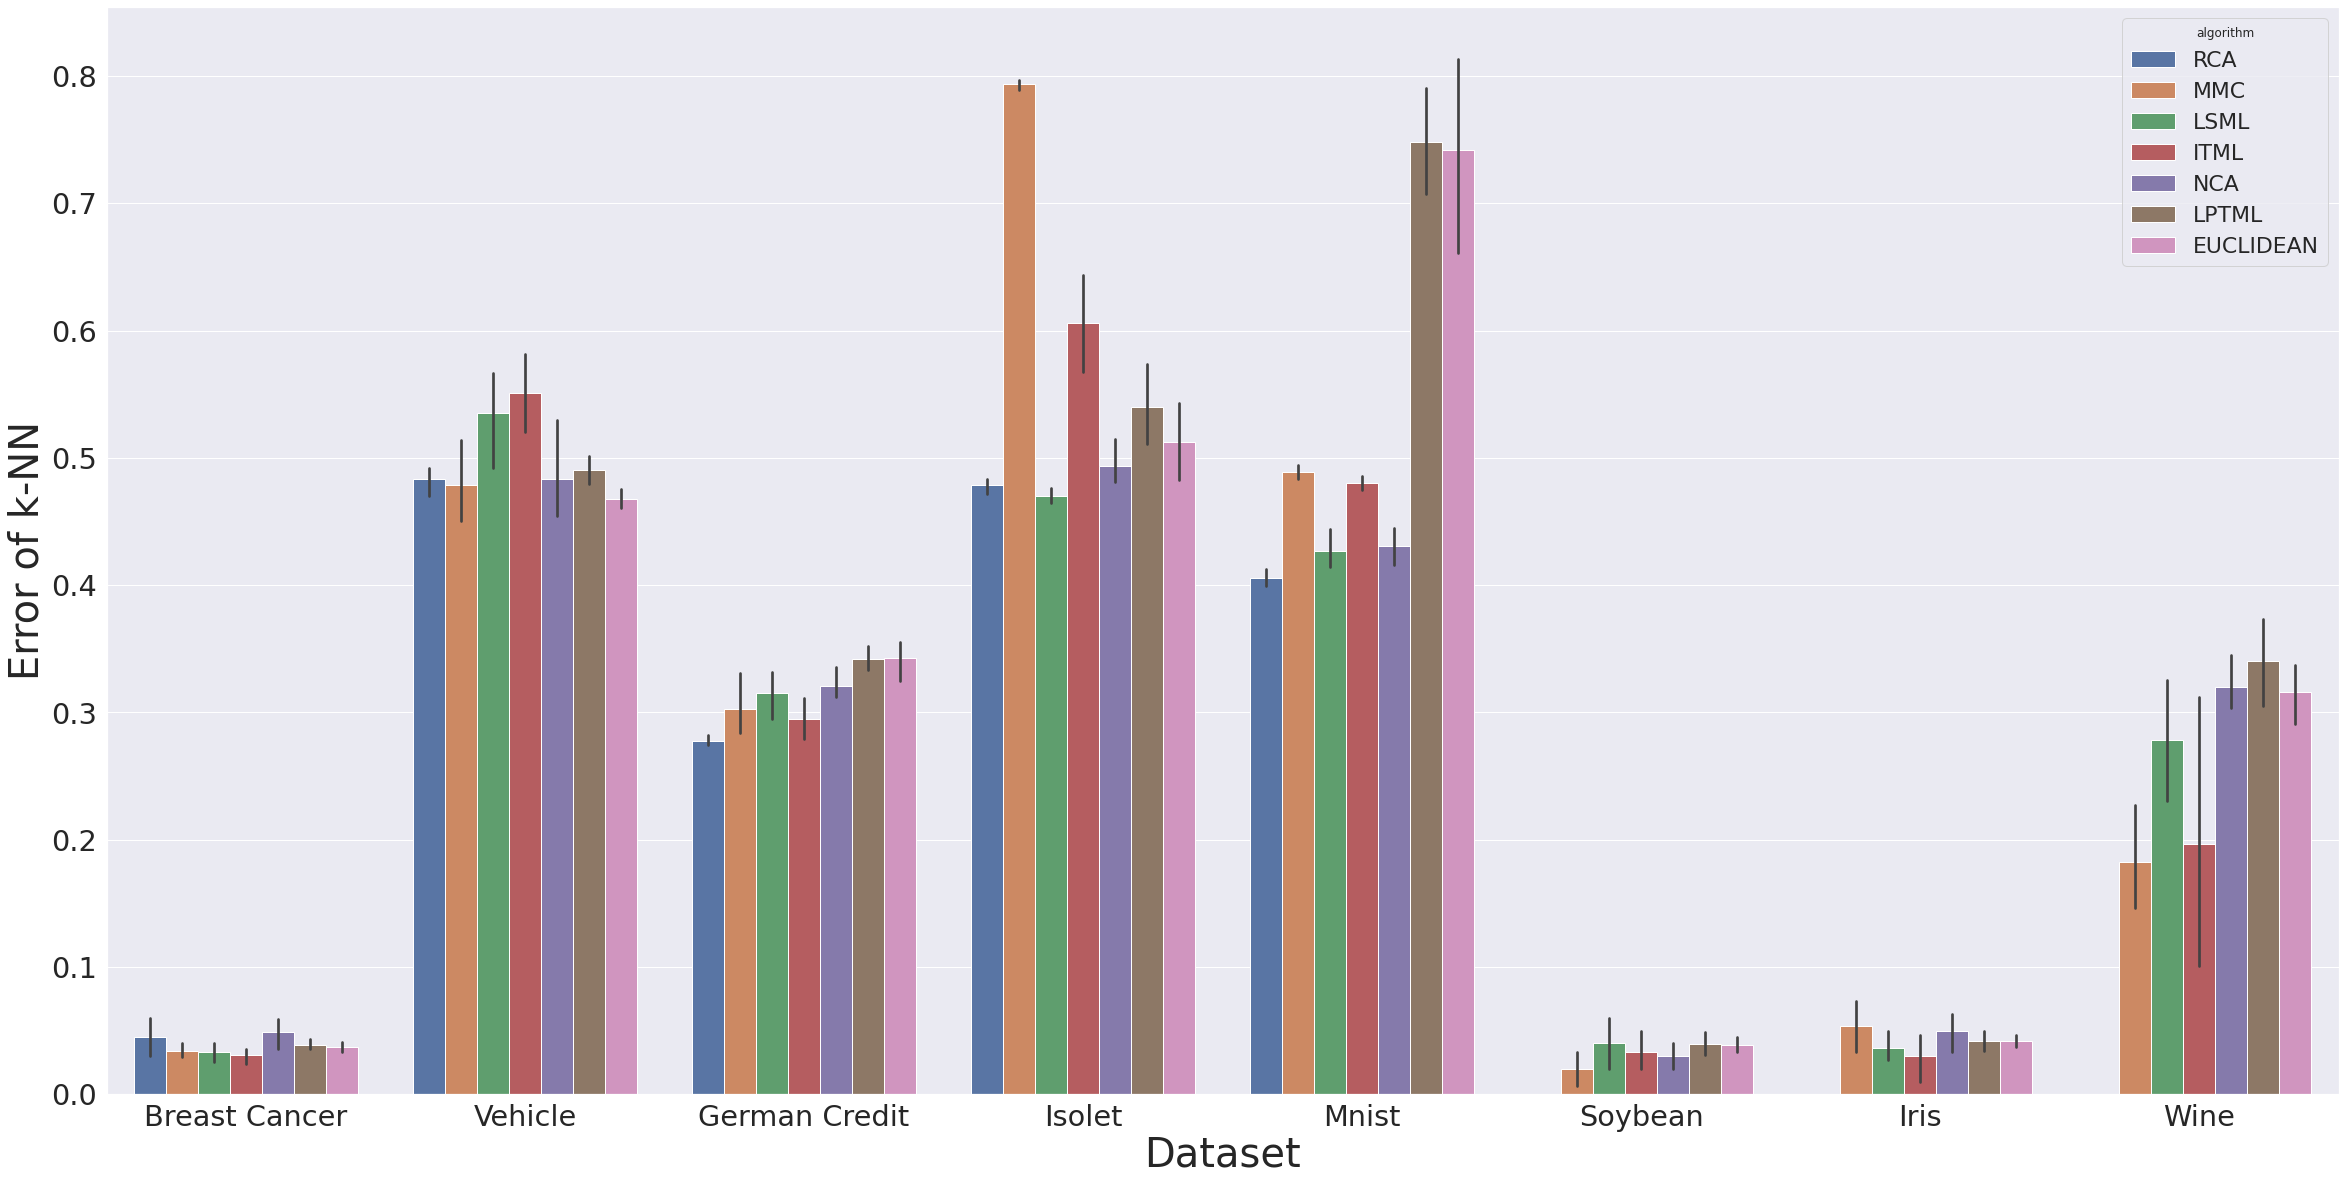

In [5]:
# Accuracy plot
plt.figure(figsize=(40, 20))
df["accuracy"] = 1 - df["accuracy"]
accuracy_df = df[["algorithm", "dataset_name", "adversarial_noise", "accuracy"]]
accuracy_df.rename(columns={"accuracy": "error"}, inplace=True)
ax = sns.barplot(x="dataset_name", y="error", data=accuracy_df, hue="algorithm")
ax.set_xlabel("Dataset", fontsize=40)
ax.set_ylabel("Error of k-NN", fontsize=40)
ax.tick_params(labelsize="large")
plt.savefig("accuracy_plot.pdf")

In [ ]:
sns.set(font_scale = 2)
g = sns.FacetGrid(accuracy_df, col="algorithm", row="adversarial_noise", sharex=False, sharey=False, height=30)
g.map(sns.barplot, "dataset_name", "error").add_legend()
plt.savefig("final.png")